<a href="https://colab.research.google.com/github/Rayson-LD/flower-python/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import shutil
from google.colab import drive

In [ ]:
drive.flush_and_unmount()
shutil.rmtree('BigFlowers')

In [ ]:

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip drive/MyDrive/BigFlowers.zip

Streaming output truncated to the last 5000 lines.
  inflating: BigFlowers/dandelion/3584415133_a4122ab7b9.jpg  
  inflating: BigFlowers/dandelion/3585220976_5acac92d1c.jpg  
  inflating: BigFlowers/dandelion/3589816063_50f8de7b64_m.jpg  
  inflating: BigFlowers/dandelion/3591588855_b4fd53b000.jpg  
  inflating: BigFlowers/dandelion/3612582808_4503fa1f8b_m.jpg  
  inflating: BigFlowers/dandelion/3662701865_3ff283a33a_n.jpg  
  inflating: BigFlowers/dandelion/3664916269_29f07c7c7b.jpg  
  inflating: BigFlowers/dandelion/3675486971_d4c8683b54_n.jpg  
  inflating: BigFlowers/dandelion/3688128868_031e7b53e1_n.jpg  
  inflating: BigFlowers/dandelion/3696596109_4c4419128a_m.jpg  
  inflating: BigFlowers/dandelion/3730618647_5725c692c3_m.jpg  
  inflating: BigFlowers/dandelion/3761310831_41b5eba622_n.jpg  
  inflating: BigFlowers/dandelion/3823142577_dd5acd5ac6_n.jpg  
  inflating: BigFlowers/dandelion/3844111216_742ea491a0.jpg  
  inflating: BigFlowers/dandelion/3856725141_0db85f466d_n.jpg  

In [ ]:
image_size = 224
batch_size = 80
base_URL = '/content/BigFlowers'
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.1,
)
train_generator = datagen.flow_from_directory(
    base_URL,
    target_size = (image_size,image_size),
    batch_size = batch_size,
    subset = 'training'
)
val_generator = datagen.flow_from_directory(
    base_URL,
    target_size = (image_size,image_size),
    batch_size = batch_size,
    subset = 'validation'
)

Found 6856 images belonging to 35 classes.
Found 743 images belonging to 35 classes.


In [ ]:

label = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt','w') as f :
  f.write(label)
  print(label)

anthurium
azalea
barbeton daisy
bird of paradise
bishop of llandaff
bougainvillea
californian poppy
camellia
cape flower
clematis
colt's foot
common dandelion
cyclamen
daisy
dandelion
foxglove
frangipani
fritillary
geranium
hibiscus
lotus
marigold
morning glory
passion flower
petunia
pink-yellow dahlia
poinsettia
roses
sunflowers
sword lily
thorn apple
tulips
wallflower
water lily
watercress


In [ ]:
image_shape = (image_size,image_size,3)
base_model = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False,weights ='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential(
    [
    base_model,
    tf.keras.layers.Conv2D(128,3,(3,3),activation = 'relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(35, activation = 'softmax'),
     
    ]
)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 9

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = model.fit(train_generator,
                    epochs = epochs,
                    steps_per_epoch=80,
                   validation_data= val_generator,
                    callbacks=[early_stopping])

Epoch 1/12
62/80 [======================>.......] - ETA: 49s - loss: 1.4754 - accuracy: 0.6250

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


80/80 [==============================] - 252s 3s/step - loss: 1.3029 - accuracy: 0.6606 - val_loss: 0.9403 - val_accuracy: 0.7349
Epoch 2/12
80/80 [==============================] - 257s 3s/step - loss: 0.3993 - accuracy: 0.8803 - val_loss: 0.9087 - val_accuracy: 0.7604
Epoch 3/12
80/80 [==============================] - 248s 3s/step - loss: 0.2191 - accuracy: 0.9349 - val_loss: 0.8960 - val_accuracy: 0.7793
Epoch 4/12
80/80 [==============================] - 242s 3s/step - loss: 0.1272 - accuracy: 0.9624 - val_loss: 0.9875 - val_accuracy: 0.7725
Epoch 5/12
80/80 [==============================] - 244s 3s/step - loss: 0.0933 - accuracy: 0.9721 - val_loss: 0.9332 - val_accuracy: 0.7981
Epoch 6/12
80/80 [==============================] - 243s 3s/step - loss: 0.0613 - accuracy: 0.9845 - val_loss: 0.8646 - val_accuracy: 0.8062
Epoch 7/12
80/80 [==============================] - 242s 3s/step - loss: 0.0331 - accuracy: 0.9939 - val_loss: 0.8719 - val_accuracy: 0.8210
Epoch 8/12
80/80 [======

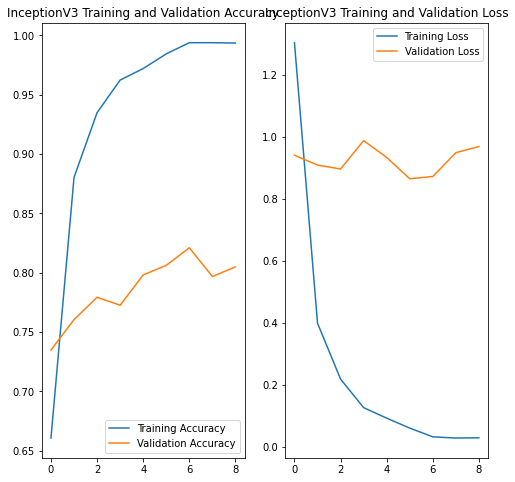

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('InceptionV3 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('InceptionV3 Training and Validation Loss')
plt.show()

In [ ]:
saved_model_dir = ''
tf.saved_model.save(model, saved_model_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f :
  f.write(tflite_model)

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: /tmp/tmpnv6r0_7c/assets


INFO:tensorflow:Assets written to: /tmp/tmpnv6r0_7c/assets


In [ ]:
from google.colab import files
files.download('model.tflite')

FileNotFoundError: ignored

In [ ]:
!unzip drive/MyDrive/test.zip

Archive:  drive/MyDrive/test.zip
   creating: test/
   creating: test/all_classess/
  inflating: test/all_classess/1.jpg  
  inflating: test/all_classess/1000352454_1000013406_1506428132.jpg  
  inflating: test/all_classess/112951022_4892b1348b_n.jpg  
  inflating: test/all_classess/112951086_150a59d499_n.jpg  
  inflating: test/all_classess/113291410_1bdc718ed8_n.jpg  
  inflating: test/all_classess/113902743_8f537f769b_n.jpg  
  inflating: test/all_classess/113960470_38fab8f2fb_m.jpg  
  inflating: test/all_classess/122450705_9885fff3c4_n.jpg  
  inflating: test/all_classess/130684927_a05164ba13_m.jpg  
  inflating: test/all_classess/130684941_d1abfa3be6_m.jpg  
  inflating: test/all_classess/130685040_3c2fcec63e_n.jpg  
  inflating: test/all_classess/130685245_dcdd23836f_m.jpg  
  inflating: test/all_classess/151979452_9832f08b69.jpg  
  inflating: test/all_classess/155646858_9a8b5e8fc8.jpg  
  inflating: test/all_classess/158988663_6fe055fcb4.jpg  
  inflating: test/all_classess/16

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

test_generator = datagen.flow_from_directory(  
         '/content/test',  
         target_size=(image_size,image_size),
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  

test_generator.reset()
   
pred= model.predict_generator(test_generator, steps = 350/10)
predicted_class_indices=np.argmax(pred, axis =1 )
labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
score = model.evaluate_generator(generator=val_generator,            
                                     steps=350/10,)
acc= score[1]
print(acc)
print(predicted_class_indices)
print (labels)
print (predictions)

Found 350 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


0.6904441714286804
[11 11 31 31 31 31 31 31 27 28 31 31 14 14 14 14 14 13 13 13 14 13 13 14
 13 14 13 25 13 14 28 14 14 27 28 27 27 27 11 27 27 28 27 13 13 28 27 12
 28 28 28 28 28 21 27 27 21 21 21 28 21 27 21 27 21 28 21 21 27 14 11 14
 14  7  7  7  7 11 11 11  7  7  7 23 23 23 23 23 23 27 23 23 23 33 33 33
 33 33 33 20 33 33 33 12 12 12 12 12 12 12 12 12 12 34 34 34 34 34 34 34
 34 34 34 16 16 16 16 16 16 16 16 16 16 32 32 32 32 32 32 32 32 32 32 24
 30 22 24 24 24  9 22 32 32 26 26 26 26 26 26 26 26 26 26  9  9  9  9  9
  9  9  9  9  9 19 19 19 19 19 19 24 19 19 19 20 20 20 20 20 20 20 20 20
 20  0  0  0  0  0  0  0  0  0  0 30 30 30 30 30 30 30 30 30 30  2  2  2
  2  2  2  2  2  2  2 29 29 26 34 15  5 29 29 29 29 22 22 22 22 22 22 22
 22 22 22 18 18 18 18 18 18 18 18 18 18  4  4  4  4  4  4  4  4  4  4  8
  1 25 25  6  6  6  6  6  6  6  6  6  6  3  3  3  3  3  3  3  3  3  3 17
 17 17 17 17 17 17  1  1  1  1  1  1  1  1  1  1  8  8  8  8  8  8  8  8
  8  8 10 10 10 10 10 10 10 10 1

In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,"Accuracy":acc})
print(results)
results.to_excel('InceptionV3_prediction.xlsx')

                                              Filename       Predictions  \
0                                   all_classess/1.jpg  common dandelion   
1    all_classess/1000352454_1000013406_1506428132.jpg  common dandelion   
2              all_classess/112951022_4892b1348b_n.jpg            tulips   
3              all_classess/112951086_150a59d499_n.jpg            tulips   
4              all_classess/113291410_1bdc718ed8_n.jpg            tulips   
..                                                 ...               ...   
345                       all_classess/image_07595.jpg          camellia   
346                       all_classess/image_07598.jpg          camellia   
347                        all_classess/image_1452.jpg        fritillary   
348                        all_classess/image_2564.jpg        fritillary   
349                         all_classess/image_478.jpg        fritillary   

     Accuracy  
0    0.690444  
1    0.690444  
2    0.690444  
3    0.690444  
4    0.

In [ ]:
from google.colab import files
files.download('InceptionV3_prediction.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>